In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas as pd

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
titles = pd.DataFrame.from_csv('data/titles.csv', index_col=None)
titles.head()

,title,year
0,The Rising Son,1990
1,The Thousand Plane Raid,1969
2,Crucea de piatra,1993
3,Country,2000
4,Gaiking II,2011


In [4]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,NaN
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


### Using groupby(), plot the number of films that have been released each decade in the history of cinema.

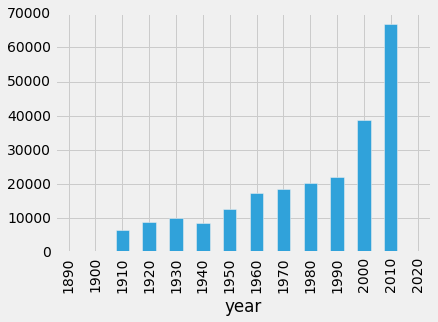

In [10]:
t = titles
t.groupby(t.year //10 *10).size().plot(kind='bar')

### Use groupby() to plot the number of "Hamlet" films made each decade.

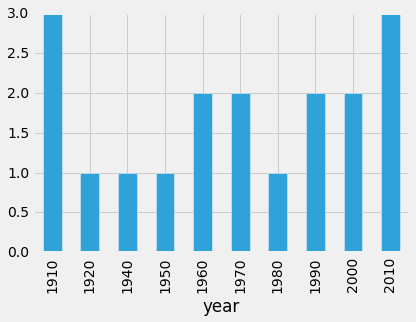

In [17]:
t = titles[titles.title == 'Hamlet']
t.groupby(t.year //10 *10).size().plot(kind='bar')

### How many leading (n=1) roles were available to actors, and how many to actresses, in each year of the 1950s?

In [19]:
c = cast[(cast.year == 1950) & (cast.n == 1)]
c.groupby(c['type']).size()

type
actor      622
actress    281
dtype: int64

### In the 1950s decade taken as a whole, how many total roles were available to actors, and how many to actresses, for each "n" number 1 through 5?

In [29]:
c = cast[(cast.year.isin(list(range(1950,1961)))) & (cast.n.isin(list(range(1,6))))]
c.groupby([c['year'],c['n'],c['type']]).size()

year  n    type   
1950  1.0  actor      622
           actress    281
      2.0  actor      436
           actress    412
      3.0  actor      503
           actress    314
      4.0  actor      532
           actress    267
      5.0  actor      554
           actress    226
1951  1.0  actor      647
           actress    279
      2.0  actor      451
           actress    426
      3.0  actor      559
           actress    291
      4.0  actor      572
           actress    255
      5.0  actor      577
           actress    252
1952  1.0  actor      607
           actress    290
      2.0  actor      430
           actress    431
      3.0  actor      532
           actress    299
      4.0  actor      521
           actress    281
      5.0  actor      542
           actress    226
                     ... 
1958  1.0  actor      704
           actress    294
      2.0  actor      489
           actress    471
      3.0  actor      583
           actress    337
      4.0  actor   

### Use groupby() to determine how many roles are listed for each of the Pink Panther movies.

In [36]:
c = cast[cast.title.str.startswith('The Pink Panther')]
c.groupby(c.year).size()

year
1963    20
1976    68
2006    90
2009    84
dtype: int64

### List, in order by year, each of the films in which Frank Oz has played more than 1 role.

In [49]:
c = cast[cast.name == 'Frank Oz']
c.groupby(c.title).size().sort_values(ascending=0).head(10)

title
The Muppet Movie                        8
The Muppets Take Manhattan              7
The Muppet Christmas Carol              7
The Great Muppet Caper                  6
Muppet Treasure Island                  4
Muppets from Space                      4
The Adventures of Elmo in Grouchland    3
Follow That Bird                        3
An American Werewolf in London          2
The Dark Crystal                        2
dtype: int64

### List each of the characters that Frank Oz has portrayed at least twice.

In [54]:
c = cast[cast.name == 'Frank Oz']
z = c.character.value_counts()
z[z>1]

Animal            6
Miss Piggy        6
Yoda              6
Sam the Eagle     5
Fozzie Bear       4
Bert              3
Cookie Monster    3
Grover            2
Name: character, dtype: int64